In [1]:
%matplotlib inline

In [34]:
from __future__ import division, print_function
import os, sys, numpy as np, pandas as pd, scipy as sp
import matplotlib.pyplot as plt, matplotlib.style as style
import scipy.io
import scipy.signal as signal
import glob
style.use('ggplot')
from matplotlib.pyplot import plot, scatter, imshow

In [55]:
os.chdir('/home/mike/ve/ml/')

In [56]:
import eegkaggle.dio.dataio as dataio

In [4]:
import hills_seizure_detection.seizure.transforms as transforms

In [5]:
path = '/run/media/mike/Elements/data/kaggle/upenn/seizure-detection/seizure-data/Patient_1/'
filenamp = '/run/media/mike/Elements/data/kaggle/upenn/seizure-detection/seizure-data/Patient_1/Patient_1_ictal_segment_10.mat'

In [7]:
os.chdir(path)

In [45]:
filez = glob.glob(path + '/*.mat')
files = glob.glob('/home/mike/data/train/' + '/*.mat')

In [11]:
for i in range(1,100):
    print(i, filez[i])

1 /run/media/mike/Elements/data/kaggle/upenn/seizure-detection/seizure-data/Patient_1/Patient_1_ictal_segment_10.mat
2 /run/media/mike/Elements/data/kaggle/upenn/seizure-detection/seizure-data/Patient_1/Patient_1_ictal_segment_11.mat
3 /run/media/mike/Elements/data/kaggle/upenn/seizure-detection/seizure-data/Patient_1/Patient_1_ictal_segment_12.mat
4 /run/media/mike/Elements/data/kaggle/upenn/seizure-detection/seizure-data/Patient_1/Patient_1_ictal_segment_13.mat
5 /run/media/mike/Elements/data/kaggle/upenn/seizure-detection/seizure-data/Patient_1/Patient_1_ictal_segment_14.mat
6 /run/media/mike/Elements/data/kaggle/upenn/seizure-detection/seizure-data/Patient_1/Patient_1_ictal_segment_15.mat
7 /run/media/mike/Elements/data/kaggle/upenn/seizure-detection/seizure-data/Patient_1/Patient_1_ictal_segment_16.mat
8 /run/media/mike/Elements/data/kaggle/upenn/seizure-detection/seizure-data/Patient_1/Patient_1_ictal_segment_17.mat
9 /run/media/mike/Elements/data/kaggle/upenn/seizure-detection/s

In [12]:
data = scipy.io.loadmat(filez[57])

In [13]:
data.keys(), data['freq'],  #data['channels']

(['__header__', '__globals__', 'channels', 'freq', '__version__', 'data'],
 array([ 499.906994]))

In [14]:
data['data'].shape

(68, 500)

In [15]:
d = data['data']

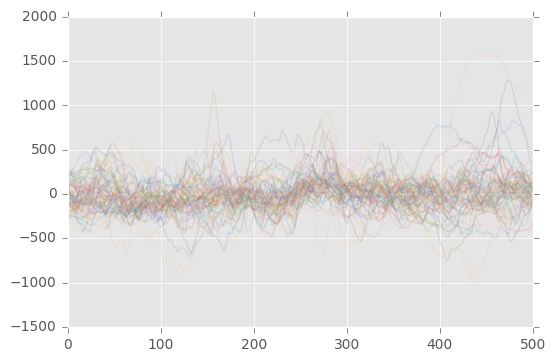

In [16]:
for i in range(68):
    plt.plot(d[i], alpha=0.15)

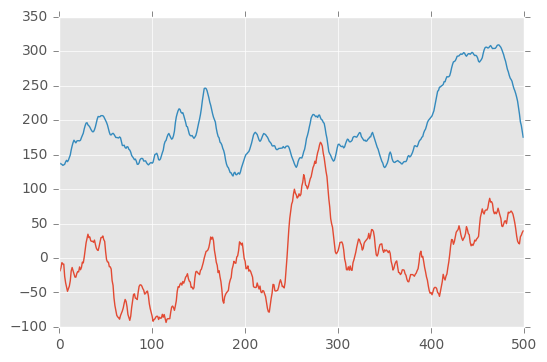

In [17]:
m = np.mean(d, axis=0)
st = np.std(d, axis=0)
plt.plot(m)
plt.plot(st)

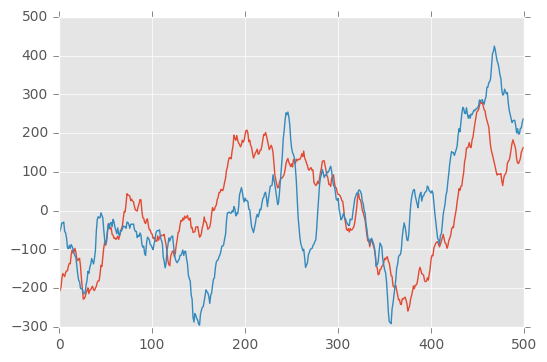

In [18]:
plt.plot(d[0])
plt.plot(d[1])

In [19]:
500**.5

22.360679774997898

In [20]:
signal.coherence(d[0], d[1])[1].shape

(129,)

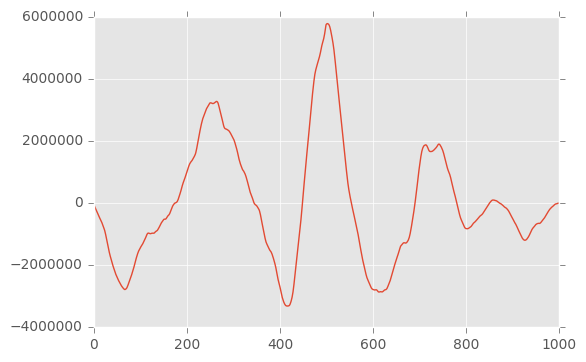

In [21]:
cs = signal.correlate(d[0], d[1])
plt.plot(cs)

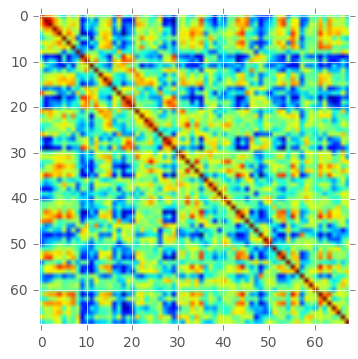

In [22]:
cc = np.corrcoef(d)
cc.shape
plt.imshow(cc)

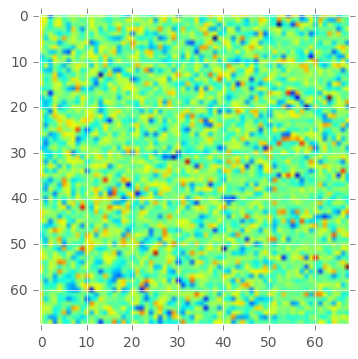

In [23]:
ei_d = np.linalg.eig(cc)
len(ei_d)
plt.imshow(ei_d[1])

In [24]:
ei_d[0].shape, ei_d[1].shape

((68,), (68, 68))

In [25]:
e = np.linalg.eigvals(cc)
e.shape

(68,)

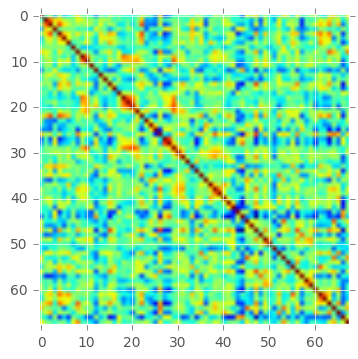

In [26]:
data = scipy.io.loadmat(filez[56])['data']
cc = np.corrcoef(data)
plt.imshow(cc)

In [27]:
ccvals = []
for i in range(50):
    data = scipy.io.loadmat(filez[i])['data']
    ccvals.append(np.corrcoef(data))
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [28]:
ccvals = np.array(ccvals)
ccvals.shape

(50, 68, 68)

-0.13769896806 1.0 0.158709388245


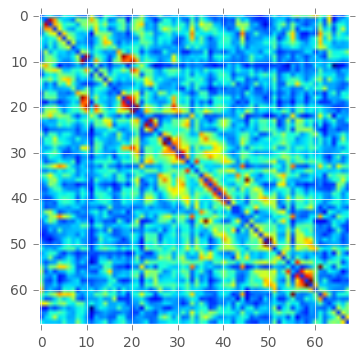

In [29]:
ccc = np.mean(ccvals, axis=0)
print(np.amin(ccc), np.amax(ccc), np.mean(ccc))
plt.imshow(ccc - np.identity(68))

In [30]:
ee = np.linalg.eig(ccc)

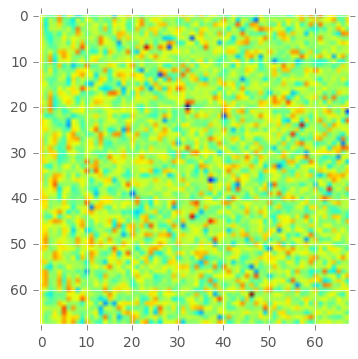

In [31]:
plt.imshow(ee[1])

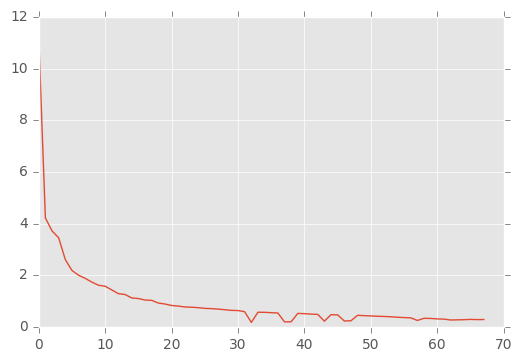

In [32]:
plt.plot(ee[0])

TypeError: tuple indices must be integers, not tuple

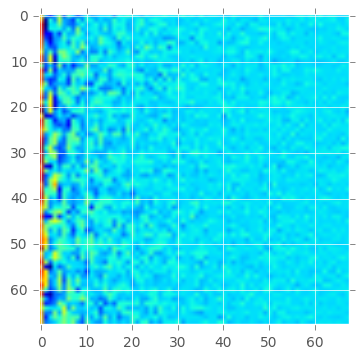

In [33]:
ccc.dot(ee[1]).shape
plt.imshow(ccc.dot(ee[1]))

In [36]:
plt.plot(ee[])

SyntaxError: invalid syntax (<ipython-input-36-83dc415d26ba>, line 1)

In [37]:
xform = transforms.FFTWithTimeFreqCorrelation(1, 48, 400, 'usf')

In [40]:
dt = xform.apply(data[0:16,:])
dt.shape

(1024,)

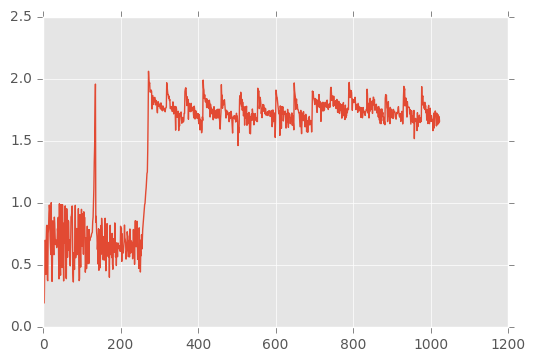

In [41]:
plt.plot(np.log(2+dt))

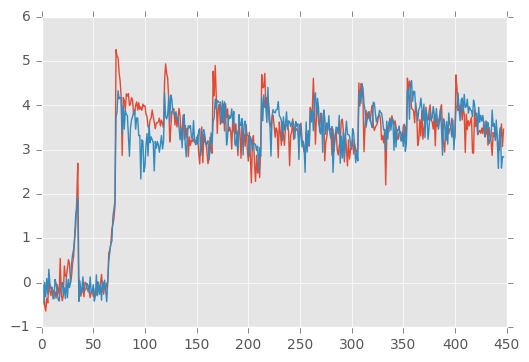

In [47]:
data = scipy.io.loadmat(filez[20])['data']
dt = xform.apply(data[0:8])
plt.plot(dt)
data = scipy.io.loadmat(filez[80])['data']
dt = xform.apply(data[0:8])
plt.plot(dt)

In [50]:
files[20]

'/home/mike/data/train/3_391_0.mat'

In [57]:
data = dataio.get_matlab_eeg_data_ary(files[20])
data.shape

(240000, 16)

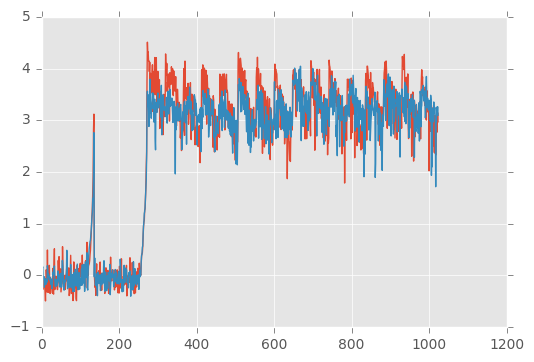

In [63]:
data = dataio.get_matlab_eeg_data_ary(files[20])
n = 1000
k = 1000
dt = xform.apply(data.T[0:16, n:n+k])
plt.plot(dt)
# data = scipy.io.loadmat(files[100])['data']
data = dataio.get_matlab_eeg_data_ary(files[100])

dt = xform.apply(data.T[0:16, n:n+k])
plt.plot(dt)